# FINAL PROJECT - 9

## 1. DESCRIPCIÓN DEL PROYECTO

**Los clientes de Beta Bank se están yendo**, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.


### 1.1 Objetivos

- Necesitamos predecir si un cliente dejará el banco pronto. Tenemos los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

- Crear un modelo con el máximo valor F1 posible. Necesitamos un valor F1 de al menos 0.59. Verificar F1 para el conjunto de prueba. 

- Además, debemos medir la métrica AUC-ROC y compararla con el valor F1.

### 1.2 Descripción de los Datos

Características

- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado

Objetivo

- Exited: El cliente se ha ido (1 - sí; 0 - no)

## 2. ABRIR Y LEER LOS DATOS

file name. Churn

### 2.1 Importar las Librerias

In [1]:
# Importar todas las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle 
from sklearn.metrics import roc_auc_score, f1_score 

import warnings
warnings.filterwarnings("ignore")

### 2.2 Abrir y Leer los Datos

In [2]:
# Abrir el archivo y guardarlo en la variable 'df'
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
# Comprobar la informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Verificar numero de filas y columnas
df.shape

(10000, 14)

**COMENTARIO**

- El conjunto de datos contiene 10,000 filas u observaciones.
- La columna tenure tiene un número significativo de valores faltantes que necesitan ser corregidos.
- Algunas características, como RowNumber, CustomerId y Surname, no son relevantes para el proceso de aprendizaje automático y pueden ser eliminadas.
- La presencia de características categóricas, como Geography y Gender, puede presentar desafíos para entrenar modelos usando regresión logística. Se aplicará Codificación One-Hot para convertir estas características categóricas en representaciones numéricas.


## 3. PRE PROCESAMIENTO DE DATOS

### 3.1 Manipular los Valores Ausentes

Se enontraron 909 valores ausentes en la columna (feature) **Tenure**

In [5]:
# Visualizar los valores unicos en 'Tenure'
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

**COMENTARIO**

Ya que los valores en 'Tenure' van del 0 al 10, vamos a rellenar los valores ausentes con el promedio de los demas valores.

In [6]:
# Rellenar los valores ausentes con 'median' (promedio)
median = df['Tenure'].median()
df['Tenure'] = df['Tenure'].fillna(median).astype(int)

In [7]:
# Comprobar el resultado de los valores unicos
df['Tenure'].unique() 

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

### 3.2 Eliminar Filas Inecesarias

Las caracteristicas inecesarias son: 

- RowNumber

- CustomerId

- Surname

In [8]:
# Eliminar features inecesarias
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3.3 Manipular las Características Categóricas

Las caracteristicas categoricas que necesitan ser cambiadas estan en 'Geography' y 'Gender'

In [9]:
# Comprobar los valores unicos en 'Gender'
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
# Comprobar los valores unicos en 'Geography'
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
# Crear dummy features utilizando one-hot encoding
data = pd.get_dummies(df, drop_first = True)
data = data.astype(int)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


### 3.4 Split Dataset

Para crear conjuntos de datos separados para entrenamiento, prueba y validación, dividiremos el conjunto de datos existente. Asignaremos el 70% de los datos para fines de entrenamiento, mientras que el 15% restante se asignará para validación y prueba respectivamente.

In [12]:
# Dividir el dataset
train, validate, test = \
              np.split(data.sample(frac=1, random_state=12345), 
                       [int(.7*len(df)), int(.85*len(df))])

In [13]:
# Comprobar el resultado
print(train.shape)
print(validate.shape)
print(test.shape)

(7000, 12)
(1500, 12)
(1500, 12)


**COMENTARIO**

Ahora que tenemos nuestros conjuntos de datos listos, los separaremos en características y variables objetivo. La variable objetivo en este caso es la columna Exited, mientras que las columnas restantes se tratarán como las características.

In [14]:
# Split 'train' dataset
features_train = train.drop(['Exited'], axis=1)
target_train = train['Exited']

In [15]:
# Split 'validate' dataset
features_valid = validate.drop(['Exited'], axis=1)
target_valid = validate['Exited']

In [16]:
# Split 'test' dataset
features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

### 3.5 Estandarización de Características Numéricas - Alta Variación

In [17]:
# Estandarizacion de datos
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [18]:
# Comprobar los resultados
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.104183,0.684058,-0.715697,-1.217598,-0.922862,1,1,0.964061,0,1,0
1402,1.102215,-0.944912,1.089145,0.867112,-0.922862,1,0,-0.408273,0,0,1
8606,1.617769,0.300771,0.006240,-1.217598,0.810910,1,1,-0.453018,0,1,1
8885,0.184527,0.588236,-0.354729,0.422031,0.810910,1,1,1.000968,0,1,1
6494,0.504171,-1.040734,0.728177,-1.217598,0.810910,1,1,-1.362485,0,0,1


**COMENTARIO** 

Los datos están listos para el modelo

## 4. COMPROBAR EL EQUILIBRIO DE CLASE

Antes de continuar con el proceso de modelado, es importante realizar una verificación de coherencia examinando el balance de clases de la característica objetivo. Analizaremos la frecuencia de las clases "1" y "0" en la característica objetivo usando el método value_counts(), que cuenta las ocurrencias de cada valor único en la característica. Esto proporcionará información sobre la distribución de clases y ayudará a asegurar la coherencia de nuestro modelo.

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


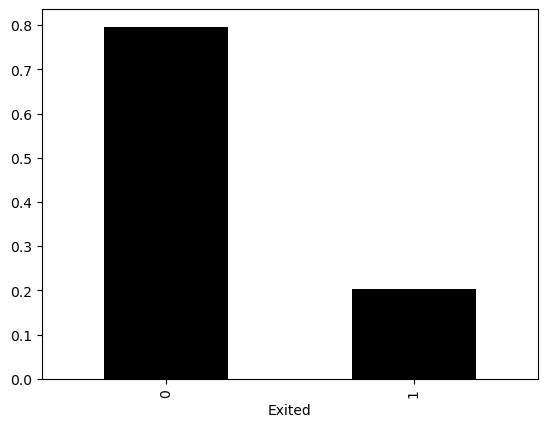

In [19]:
# Comprobar 'class balance'
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', color = 'black')

plt.show()

**COMENTARIO**

El conjunto de datos que tenemos está relativamente desequilibrado, con la clase mayoritaria (valor '0') representando casi el 80 por ciento de los datos objetivo. Por lo tanto, para evaluar el rendimiento de nuestro modelo, necesitamos considerar métricas más allá de la precisión tradicional. En este caso, utilizaremos el F1 score y las métricas de precisión AUC-ROC, que son más adecuadas para manejar el desequilibrio de clases. Al usar estas métricas, podemos evaluar la capacidad del modelo para clasificar con precisión tanto las clases mayoritarias como las minoritarias.

## 5. ENTRENAR EL MODELO SIN CONSIDERAR EL DESEQUILIBRIO

Ahora es momento de crear el modelo. Para el modelado inicial, procederemos sin abordar el desequilibrio de clases para evaluar el rendimiento del modelo. Si el modelo demuestra una precisión satisfactoria y cumple con el nivel deseado de rendimiento, se puede considerar confiable. Sin embargo, si la precisión no cumple con las expectativas, abordaremos el problema del desequilibrio de clases para mejorar el rendimiento del modelo.

En este análisis, emplearemos tres modelos de aprendizaje automático de clasificación para determinar el mejor ajuste para nuestro conjunto de datos: árbol de decisión, bosque aleatorio y regresión logística. Al evaluar el rendimiento de estos modelos, podemos identificar el enfoque más adecuado para nuestra tarea de clasificación.

### 5.1 Arbol de Decision

Ajustaremos los hiperparámetros del modelo de árbol de decisión para prevenir el sobreajuste. Específicamente, nos enfocaremos en dos hiperparámetros: 
- max_depth, que determina la profundidad del árbol de decisión, y 
- random_state, que asegura la reproducibilidad al establecer una semilla aleatoria fija (12345).

Para evaluar la calidad del modelo, evaluaremos tanto el puntaje F1 como el puntaje AUC-ROC. El puntaje F1 compara los resultados predichos con los valores reales de la variable objetivo del conjunto de datos de validación. Además, la función roc_auc_score mide el área bajo la curva característica de operación del receptor (ROC), que ilustra el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos. Para calcular este puntaje, utilizaremos la función predict_proba() para obtener la probabilidad de la clase positiva para cada observación en el conjunto de datos de validación.

In [20]:
# Crear el modelo de arbol de decision
for i in range(1, 11):     
    dt_model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    dt_model.fit(features_train, target_train)
    dt_pred_train=dt_model.predict(features_train)
    dt_pred_valid=dt_model.predict(features_valid)
    probabilities_valid = dt_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1_train = f1_score(target_train, dt_pred_train).round(2)
    f1_valid = f1_score(target_valid, dt_pred_valid).round(2)
    roc_auc = roc_auc_score(target_valid, probabilities_one_valid).round(2)
    print('Max depth {}, F1 score data train = {:.2f} | F1 score data valid = {:.2f} | AUC-ROC score = {:.2f}'\
          .format(i, f1_train, f1_valid, roc_auc))

Max depth 1, F1 score data train = 0.00 | F1 score data valid = 0.00 | AUC-ROC score = 0.67


Max depth 2, F1 score data train = 0.51 | F1 score data valid = 0.50 | AUC-ROC score = 0.73
Max depth 3, F1 score data train = 0.40 | F1 score data valid = 0.37 | AUC-ROC score = 0.77
Max depth 4, F1 score data train = 0.52 | F1 score data valid = 0.52 | AUC-ROC score = 0.80
Max depth 5, F1 score data train = 0.50 | F1 score data valid = 0.51 | AUC-ROC score = 0.83
Max depth 6, F1 score data train = 0.57 | F1 score data valid = 0.55 | AUC-ROC score = 0.84
Max depth 7, F1 score data train = 0.62 | F1 score data valid = 0.58 | AUC-ROC score = 0.84
Max depth 8, F1 score data train = 0.67 | F1 score data valid = 0.59 | AUC-ROC score = 0.83
Max depth 9, F1 score data train = 0.69 | F1 score data valid = 0.59 | AUC-ROC score = 0.82
Max depth 10, F1 score data train = 0.74 | F1 score data valid = 0.57 | AUC-ROC score = 0.78


**COMENTARIO**

La mejor configuración de rendimiento para el modelo de árbol de decisión se logra con una max_depth de 8. Esta configuración resulta en el puntaje F1 más alto (0.59) en los datos de validación, así como un puntaje AUC-ROC relativamente alto de 0.83 (el tercero más alto entre las configuraciones probadas). Aunque hay una diferencia notable en el puntaje F1 entre los datos de entrenamiento y validación, sigue dentro de un rango razonable, lo que sugiere que el modelo no está sobreajustado.

### 5.2 Bosque Aleatorio

Procederemos a probar el segundo modelo, que es el bosque aleatorio. En este modelo, ajustaremos el parámetro n_estimators, que representa el número de árboles en el bosque. Probaremos valores que van desde 10 hasta 100 árboles. Además, también exploraremos el parámetro max_depth dentro del rango de 1 a 10, manteniendo el parámetro random_state fijo en 12345.

In [21]:
# Crear el modelo random forest
rf = []
for i in range(1, 11):
    for j in range(10, 101, 10):
        rf_model = RandomForestClassifier(random_state=12345, max_depth=i, n_estimators=j)
        rf_model.fit(features_train, target_train)
        rf.append(rf_model)
    
print(max(rf, key=lambda rf_model: f1_score(rf_model.predict(features_valid), target_valid)))

RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345)


**COMENTARIO**

El modelo de mejor rendimiento para el clasificador de bosques aleatorios se logra con los hiperparámetros max_depth = 9, n_estimators = 40 y random_state = 12345.

Ahora evaluaremos el puntaje F1 y el puntaje AUC-ROC para este modelo. Estas métricas proporcionarán información sobre el rendimiento y la calidad de nuestro modelo.

In [22]:
# Comprobar el mejor modelo
best_rf_model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=40)
best_rf_model.fit(features_train, target_train)
best_rf_train = best_rf_model.predict(features_train) 
best_rf_pred = best_rf_model.predict(features_valid)
probabilities_rf_valid=best_rf_model.predict_proba(features_valid)
probabilities_rf_one_valid=probabilities_rf_valid[:, 1]
print('F1 score train =', f1_score(target_train, best_rf_train).round(2), '   ',\
      'F1 score valid =', f1_score(target_valid, best_rf_pred).round(2), '   ', \
      'AUC-ROC =', roc_auc_score(target_valid, probabilities_rf_one_valid).round(2))

F1 score train = 0.65     F1 score valid = 0.58     AUC-ROC = 0.85


**COMENTARIO**

Con el modelo de bosque aleatorio, logramos los mejores puntajes con un puntaje F1 de validación de 0.58 y un puntaje AUC-ROC de 0.85. Aunque hay una diferencia notable entre los puntajes F1 de los conjuntos de entrenamiento y validación, el rendimiento del modelo sigue siendo aceptable.

### 5.3 Regresión Logística

Ahora procederemos con el tercer modelo, que es la regresión logística. A diferencia de los dos modelos anteriores, la regresión logística no implica hiperparámetros relacionados con la profundidad del árbol o el número de árboles. En su lugar, especificaremos el parámetro solver, y en este caso, usaremos liblinear. Mantendremos el parámetro random_state establecido en 12345.

In [23]:
# Crear el modelo de logistic regression
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(features_train, target_train)
lr_valid_train=lr_model.predict(features_train)
lr_valid_pred=lr_model.predict(features_valid)
probabilities_lr_valid=lr_model.predict_proba(features_valid)
probabilities_lr_one_valid=probabilities_lr_valid[:, 1]
print('F1 score train =', f1_score(target_train, lr_valid_train).round(2), '   ', \
      'F1 score valid =', f1_score(target_valid, lr_valid_pred).round(2), '   ',\
      'AUC-ROC =', roc_auc_score(target_valid, probabilities_lr_one_valid).round(2))

F1 score train = 0.31     F1 score valid = 0.34     AUC-ROC = 0.77


**COMENTARIO**

El modelo de regresión logística parece tener un rendimiento peor que los dos modelos anteriores. El puntaje F1 de validación es solo 0.34 y el AUC-ROC es 0.77. Aunque el rango entre los puntajes F1 para los conjuntos de entrenamiento y validación no es significativo, lo que sugiere que el modelo no está sobreajustado, el rendimiento general es relativamente más bajo en comparación con los modelos de árbol de decisión y bosque aleatorio.

## 6. ENTRENAR MODELOS CORRIGIENDO EL DESEQUILIBRIO DE CLASES

Después de entrenar el modelo sin mejorar la calidad del conjunto de datos, obtuvimos resultados decentes. El mejor modelo logró un puntaje F1 de 0.58 y un AUC-ROC de 0.85 utilizando el algoritmo de bosque aleatorio con hiperparámetros (random_state=12345, max_depth=9, n_estimators=40). Por lo tanto, hemos decidido proceder con el modelo de bosque aleatorio.

Sin embargo, considerando el desequilibrio en nuestro conjunto de datos, necesitamos explorar métodos para mejorar la calidad de los datos abordando el problema del desequilibrio de clases. Los puntajes F1 obtenidos del modelo sin mejorar la calidad no son lo suficientemente altos. Intentaremos mejorar la calidad del conjunto de datos ajustando el equilibrio de clases y empleando técnicas de sobremuestreo y submuestreo.

### 6.1 Ajuste de Equilibrio de Clase

In [24]:
# Aplicar el mejor modelo (random forest) y balancear el equilibrio de clases
best_rf_model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=40, class_weight='balanced')
best_rf_model.fit(features_train, target_train)
best_rf_train = best_rf_model.predict(features_train) 
best_rf_pred = best_rf_model.predict(features_valid)
probabilities_rf_valid=best_rf_model.predict_proba(features_valid)
probabilities_rf_one_valid=probabilities_rf_valid[:, 1]
print('F1 score train =', f1_score(target_train, best_rf_train).round(2), '   ', \
      'F1 score valid =', f1_score(target_valid, best_rf_pred).round(2), '   ', \
      'AUC-ROC =', roc_auc_score(target_valid, probabilities_rf_one_valid).round(2))

F1 score train = 0.74     F1 score valid = 0.61     AUC-ROC = 0.85


**COMENTARIO**

Obtuvimos puntajes satisfactorios de F1 y AUC-ROC para nuestros modelos, aunque hay una diferencia notable entre los puntajes F1 de los conjuntos de datos de entrenamiento y validación.

### 6.2 Sobremuestreo

Abordaremos el problema del desequilibrio de clases aumentando el número de muestras con un valor objetivo de '1', que actualmente representa solo el 20 por ciento de los datos. Intentaremos aumentar la clase minoritaria mediante un proceso de sobremuestreo para aumentar su representación en un factor de tres.

In [25]:
# Sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1] 
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [26]:
# Checking the result
target_upsampled.value_counts()

Exited
0    5605
1    4185
Name: count, dtype: int64

**COMENTARIO**

El dataset está relativamente balanceado, ahora podemos hacer un test del modelo

In [27]:
# Entrenamiento del modelo con sobremuestreo
best_rf_model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=40)
best_rf_model.fit(features_upsampled, target_upsampled)
best_rf_train = best_rf_model.predict(features_upsampled) 
best_rf_pred = best_rf_model.predict(features_valid)
probabilities_rf_valid=best_rf_model.predict_proba(features_valid)
probabilities_rf_one_valid=probabilities_rf_valid[:, 1]
print('F1 score train =', f1_score(target_upsampled, best_rf_train).round(2), '   ', \
      'F1 score valid =', f1_score(target_valid, best_rf_pred).round(2), '   ', \
      'AUC-ROC =', roc_auc_score(target_valid, probabilities_rf_one_valid).round(2))

F1 score train = 0.83     F1 score valid = 0.62     AUC-ROC = 0.86


**COMENTARIO**

El método de sobremuestreo produjo puntajes de F1 y AUC-ROC relativamente mejorados en comparación con el método de ajuste de pesos de clase. Sin embargo, vale la pena señalar que la diferencia entre los puntajes de entrenamiento y validación de F1 es bastante significativa.

### 6.3 Submuestreo

Disminuiremos el número de muestras con un valor objetivo de '0', ya que representa el 80 por ciento de los datos. Eliminaremos aleatoriamente algunas muestras de las observaciones con un valor objetivo de '0' para reequilibrar el conjunto de datos.

In [28]:
# Aplicacion de funcion para submuestreo
def downsample(features, target, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1] 
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.3
)

In [29]:
# Comprobar los resultados
target_downsampled.value_counts()

Exited
0    1682
1    1395
Name: count, dtype: int64

In [30]:
# Entrenar el modelo con el dataset de submuestreo
best_rf_model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=40)
best_rf_model.fit(features_downsampled, target_downsampled)
best_rf_train = best_rf_model.predict(features_downsampled) 
best_rf_pred = best_rf_model.predict(features_valid)
probabilities_rf_valid=best_rf_model.predict_proba(features_valid)
probabilities_rf_one_valid=probabilities_rf_valid[:, 1]
print('F1 score train =', f1_score(target_downsampled, best_rf_train).round(2), '   ', \
      'F1 score valid =', f1_score(target_valid, best_rf_pred).round(2), '   ', \
      'AUC-ROC =', roc_auc_score(target_valid, probabilities_rf_one_valid).round(2))

F1 score train = 0.86     F1 score valid = 0.58     AUC-ROC = 0.84


**COMENTARIO**

Obtenemos puntajes de F1 y AUC-ROC más bajos que con el método de sobremuestreo.

Observamos que el modelo de bosque aleatorio con el método de sobremuestreo produjo el puntaje más alto. Sin embargo, hay una diferencia notable entre el puntaje de F1 de entrenamiento y el puntaje de validación. Aun así, el puntaje de F1 de validación superó el umbral mínimo de 0.59 requerido para esta tarea.

## 7. PRUEBA FINAL

Es hora de evaluar el rendimiento de nuestro modelo en el conjunto de datos de prueba, que consta de características de prueba (features_test) y objetivo de prueba (target_test).

In [31]:
# Prueba del modelo
best_rf_model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=40)
best_rf_model.fit(features_upsampled, target_upsampled)
best_rf_train = best_rf_model.predict(features_upsampled) 
best_rf_test = best_rf_model.predict(features_test)
probabilities_rf_test = best_rf_model.predict_proba(features_test)
probabilities_rf_one_test = probabilities_rf_test[:, 1]
print('F1 score train =', f1_score(target_upsampled, best_rf_train).round(2), '   ', \
      'F1 score test =', f1_score(target_test, best_rf_test).round(2), '   ', \
      'AUC-ROC =', roc_auc_score(target_test, probabilities_rf_one_test).round(2))

F1 score train = 0.83     F1 score test = 0.65     AUC-ROC = 0.87


**COMENTARIO**

Obtuvimos un puntaje F1 de 0.65 en el conjunto de datos de prueba, superando el umbral mínimo de 0.59 requerido para esta tarea. Esto indica que nuestro modelo se desempeña bien en predecir si un cliente dejará pronto el banco o no.

## 8. CONCLUSION FINAL


Según nuestra evaluación, hemos logrado crear un modelo sólido que puede anticipar la probabilidad de que los clientes cambien de banco. 

Utilizamos el modelo `bosque aleatorio`, ajustando cuidadosamente ciertos parámetros que nos llevaron a identificarlo como el mejor modelo para esta tarea en particular, algunos de los parámetros utilizados fueron: 
- random_state a 12345, 
- max_depth a 9 y 
- n_estimators a 40, 

Al poner a prueba este modelo en un conjunto de datos independiente, obtuvimos resultados prometedores: 
- un puntaje F1 de 0.656 y, 
- un AUC-ROC de 0.87. 

Estos resultados **superan por mucho el umbral mínimo requerido de 0.59** para este proyecto, indicando claramente la capacidad del modelo para prever con precisión la rotación de clientes.

La información obtenida a través de este análisis permite a los bancos ahora detectar de manera proactiva a los clientes que podrían estar considerando cambiar de entidad y tomar medidas preventivas para retenerlos. Este enfoque predictivo tiene el potencial de ser una herramienta invaluable para mejorar las estrategias de retención de clientes y, en última instancia, el rendimiento general de las instituciones bancarias.

Ahora, para expresar en términos más simples lo que representa y las capacidades del modelo que se ha creado lo explicaré de la siguiente manera: 

1. `F1 score train = 0.83:`  Esto significa que cuando el modelo mira los datos que ya ha visto durante el entrenamiento, puede predecir correctamente si un cliente se irá del banco el 83% de las veces. En pocas palabras, cuando le enseñamos al modelo cómo funcionan los datos, lo hace bastante bien en esta tarea.

2. `F1 score test = 0.65:`  Ahora, cuando el modelo se enfrenta a nuevos datos que nunca antes ha visto, su rendimiento baja un poco. Aquí, solo puede predecir correctamente si un cliente se irá del banco el 65% de las veces. No es tan alto como en el entrenamiento, pero sigue siendo decente.

3. `AUC-ROC = 0.87:`  Esta métrica mide qué tan bien el modelo puede distinguir entre los clientes que se irán del banco y aquellos que no lo harán, utilizando la probabilidad de sus predicciones. Un valor de 0.87 es muy bueno, indica que el modelo puede predecir correctamente si un cliente se irá del banco o no el 87% de las veces.